# ---------- Lending Club Case Study ---------------
## Loading Data

### Imports and Initial Setup

In [61]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import datetime as dt
import warnings


#setting display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Suppress warnings
warnings.filterwarnings('ignore')

### Load data from CSV

In [62]:
# Importing the loan.csv file
data_original = pd.read_csv('C:\\Users\\rajat\\Downloads\\git_upgrad\\lending_club_case_study\\loan.csv', header = 0)
data = data_original
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0  10.65%   162.87       B     B2        NaN                       10+ years   
1  15.27%   59.83        C     C4        Ryder                     < 1 year    
2  15.96%   84.33        C     C5        NaN                       10+ years   
3  13.49%   339.31       C     C1        AIR RESOURCES BOARD       10+ years   
4  12.69%   67.79        B     B5        University Medical Group  1 year      

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0  RENT           24000.0     Verified            Dec-11  Fully Paid    
1  RENT           30000.0     Source Verified     Dec-11  Charged Off   
2  RENT           12252.0     Not Verified        Dec-11  Fully Paid    
3  RENT           49200.0     Source Verified     Dec-11  Fully Paid    
4  RENT           80000.0     Source Verified     Dec-11  Current       

  pymnt_plan  \
0  n           
1  n           
2  n           
3  n           
4  n           

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2  NaN                                                                                                                                                                                                                                                                                                          

In [63]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',data.shape[1])
print('Number of Rows:',data.shape[0])
## Number of missing values
print('Number of missing values:',data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',data.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263364
Number of unique values: 416801
Number of duplicates: 0


In [64]:
# Describing the dataframe
print(data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05  7456.670694   7187.238670    
min    5.473400e+04  7.069900e+04  500.000000    500.000000     
25%    5.162210e+05  6.667800e+05  5500.000000   5400.000000    
50%    6.656650e+05  8.508120e+05  10000.000000  9600.000000    
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count  39717.000000     39717.000000  3.971700e+04  39717.000000   
mean   10397.448868     324.561922    6.896893e+04  13.315130      
std    7128.450439      208.874874    6.379377e+04  6.678594       
min    0.000000         15.690000     4.000000e+03  0.000000       
25%    5000.000000      167.020000    4.040400e+04  8.170000       
50%   

### Data Dictionary Review

In [65]:
# Loading data dictionary values
pd.set_option('display.max_colwidth', -1)
dict = pd.read_excel('C:\\Users\\rajat\\Downloads\\git_upgrad\\lending_club_case_study\\Data_Dictionary.xlsx')
dict.head(5)

LoanStatNew  \
0  acc_now_delinq         
1  acc_open_past_24mths   
2  addr_state             
3  all_util               
4  annual_inc             

                                                                     Description  
0  The number of accounts on which the borrower is now delinquent.                
1  Number of trades opened in past 24 months.                                     
2  The state provided by the borrower in the loan application                     
3  Balance to credit limit on all trades                                          
4  The self-reported annual income provided by the borrower during registration.

In [66]:
data.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std      7456.670694 
min      500.000000  
25%      5500.000000 
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Removing the irrelevant columns

In [67]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
data=data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1)
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
data=data.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
data=data.drop(['zip_code'],axis=1)
# Removing member_id as it is a duplicate index column and is not required for the analysis
data=data.drop(['member_id'],axis=1)
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
data=data.drop(['funded_amnt_inv'],axis=1)
# Shape of the dataframe after removing columns
print(data.shape)

(39717, 80)


Removed the above columns as they are customer behavior variables and are not available at time of decision and hence not useful for analysis.

In [68]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(data.nunique().sort_values(ascending=True))

total_rev_hi_lim                  0    
mths_since_recent_inq             0    
mths_since_recent_bc_dlq          0    
mths_since_recent_bc              0    
mort_acc                          0    
mo_sin_rcnt_tl                    0    
mo_sin_rcnt_rev_tl_op             0    
mo_sin_old_rev_tl_op              0    
mo_sin_old_il_acct                0    
bc_util                           0    
bc_open_to_buy                    0    
avg_cur_bal                       0    
acc_open_past_24mths              0    
inq_last_12m                      0    
total_cu_tl                       0    
inq_fi                            0    
mths_since_recent_revol_delinq    0    
total_bc_limit                    0    
num_accts_ever_120_pd             0    
num_actv_rev_tl                   0    
total_bal_ex_mort                 0    
tot_hi_cred_lim                   0    
percent_bc_gt_75                  0    
pct_tl_nvr_dlq                    0    
num_tl_op_past_12m                0    


In [69]:
# Removing irrelevant columns which contain 1 unique value
data = data.loc[:,data.nunique()>1]
# Shape of the dataframe after removing columns
print(data.shape)

(39717, 18)


In [70]:
# Columns in the dataframe
print(data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


### Removing and fixing the null values

In [71]:
# Checking for missing values across the dataframe
print(data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies    697 
annual_inc              0   
dti                     0   
addr_state              0   
purpose                 0   
loan_status             0   
issue_d                 0   
verification_status     0   
id                      0   
loan_amnt               0   
sub_grade               0   
grade                   0   
installment             0   
int_rate                0   
term                    0   
funded_amnt             0   
home_ownership          0   
dtype: int64


In [72]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(data.nunique().sort_values(ascending=True))

term                    2    
pub_rec_bankruptcies    3    
loan_status             3    
verification_status     3    
home_ownership          5    
grade                   7    
emp_length              11   
purpose                 14   
sub_grade               35   
addr_state              50   
issue_d                 55   
int_rate                371  
loan_amnt               885  
funded_amnt             1041 
dti                     2868 
annual_inc              5318 
installment             15383
id                      39717
dtype: int64


In [73]:
# Columns in the dataframe
print(data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


#### Removing and fixing the null values

In [74]:

# Checking for missing values across the dataframe
print(data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies    697 
annual_inc              0   
dti                     0   
addr_state              0   
purpose                 0   
loan_status             0   
issue_d                 0   
verification_status     0   
id                      0   
loan_amnt               0   
sub_grade               0   
grade                   0   
installment             0   
int_rate                0   
term                    0   
funded_amnt             0   
home_ownership          0   
dtype: int64


In [75]:
# Removing null values in emp_title columns
data = data.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(data.shape)

(38642, 18)


In [76]:
# Inserting 0 for null values in pub_rec_bankruptcies column
data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [77]:
# Checking for NULL values across the dataframe
print(data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


### Removing duplicate rows from the dataframe

In [78]:
# Removing duplicate rows in the dataframe
print(data.shape)
data = data.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(data.shape)

(38642, 18)
(38642, 18)


In [79]:
# Checking information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [80]:
# Correcting data type and format for columns in the dataframe
## Derving more columns with the conversion of data type
data.term=data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
data.int_rate=data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
data.grade=data.grade.astype('category')
data.sub_grade=data.sub_grade.astype('category')
data.emp_length=data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
data.home_ownership=data.home_ownership.astype('category')
data.verification_status=data.verification_status.astype('category')
data.issue_d=pd.to_datetime(data.issue_d,format='%b-%y')
data['issue_year']=pd.to_datetime(data.issue_d,format='%b-%y').dt.year
data['issue_month']=pd.to_datetime(data.issue_d,format='%b-%y').dt.month
# loan_data.loan_status=loan_data.loan_status.apply(lambda x: x.replace('Fully Paid','0').replace('Charged Off','1').replace('Current','2')).astype('int')
data.purpose=data.purpose.astype('category')
data.addr_state=data.addr_state.astype('category')

In [81]:
# Setting decimal point limit for all data 
for x in data.columns:
    if(data[x].dtype=='float64'):
      data[x]=data[x].round(2)
      
data.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501  5000       5000         36    10.65     162.87       B      
1  1077430  2500       2500         60    15.27     59.83        C      
2  1077175  2400       2400         36    15.96     84.33        C      
3  1076863  10000      10000        36    13.49     339.31       C      
4  1075358  3000       3000         60    12.69     67.79        B      

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0  B2        10.0        RENT           24000.0     Verified             
1  C4        0.5         RENT           30000.0     Source Verified      
2  C5        10.0        RENT           12252.0     Not Verified         
3  C1        10.0        RENT           49200.0     Source Verified      
4  B5        1.0         RENT           80000.0     Source Verified      

     issue_d  loan_status         purpose addr_state    dti  \
0 2011-12-01  Fully Paid   credit_card     AZ         27.65   
1 2011-12-01  Charged Off  car             GA         1.00    
2 2011-12-01  Fully Paid   small_business  IL         8.72    
3 2011-12-01  Fully Paid   other           CA         20.00   
4 2011-12-01  Current      other           OR         17.94   

   pub_rec_bankruptcies  issue_year  issue_month  
0  0.0                   2011        12           
1  0.0                   2011        12           
2  0.0                   2011        12           
3  0.0                   2011        12           
4  0.0                   2011        12

#### As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.


In [82]:
data = data.drop_duplicates(keep = 'first')
data = data[data['loan_status'] != 'Current'] 
data2 = data
print(data2.shape)

(37544, 20)


As the data has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis.

In [83]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
data2 = data2[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
data2.shape

(37544, 17)

In [84]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

### Removing the outliers


In [85]:
##C loan_amnt
px.box(data2,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()
## Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.

In [86]:
## int_rate
px.box(data2,x='int_rate',width=750,height=350,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()
## Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

In [87]:
## annual_inc
px.box(data2,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Borrower',labels={'annual_inc':'Annual Income'}).show()
## Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.

In [88]:
px.line(sorted(data2.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [89]:
## Removing outliers in annual_inc greater than 99th percentile
data2 = data2[data2.annual_inc<=np.percentile(data2.annual_inc,99)]

In [90]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(data2.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

### Univariate Analysis

In [91]:
# Loan Amount
print(data2.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(data2,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

count    37173.000000
mean     11034.824335
std      7272.289190 
min      500.000000  
25%      5400.000000 
50%      9800.000000 
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


The loan amount varies from 500 to 35000 with a mean of 11119.

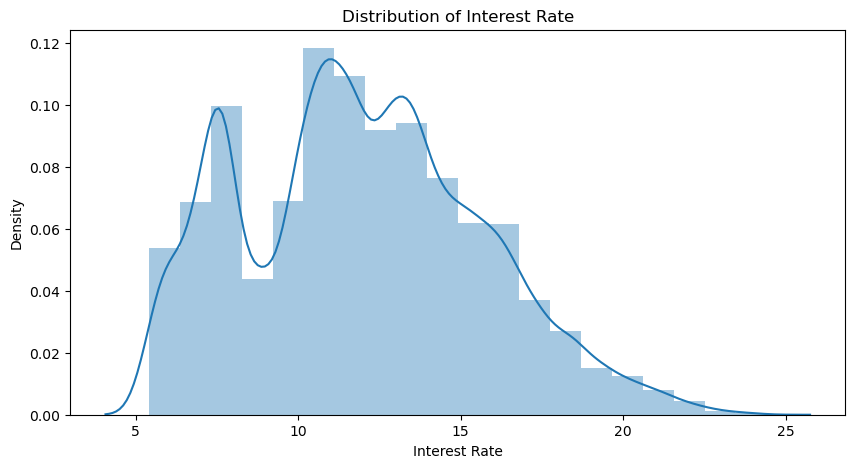

In [92]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sb.distplot(sorted(data2.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

The interest rate is more accumulated around 5-8 and 10-17 with a drop near 10.

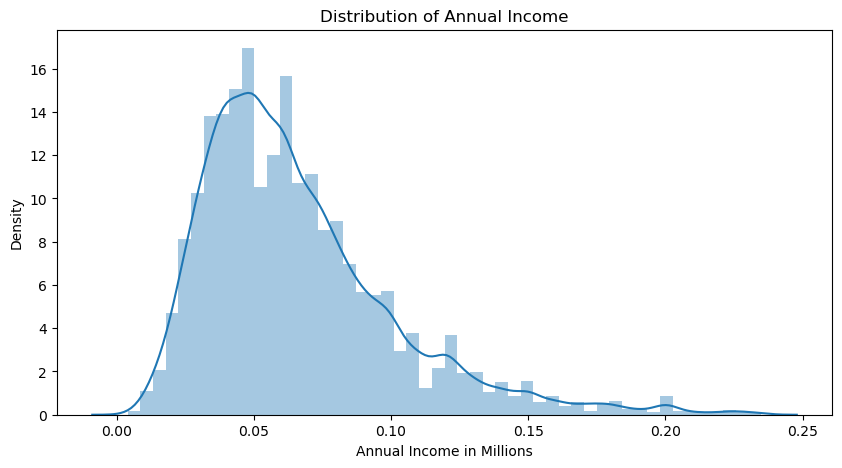

In [93]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sb.distplot(data2.annual_inc/1000000,kde=True,bins=50)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

Majority of burrowers have very low annual income compared to rest.

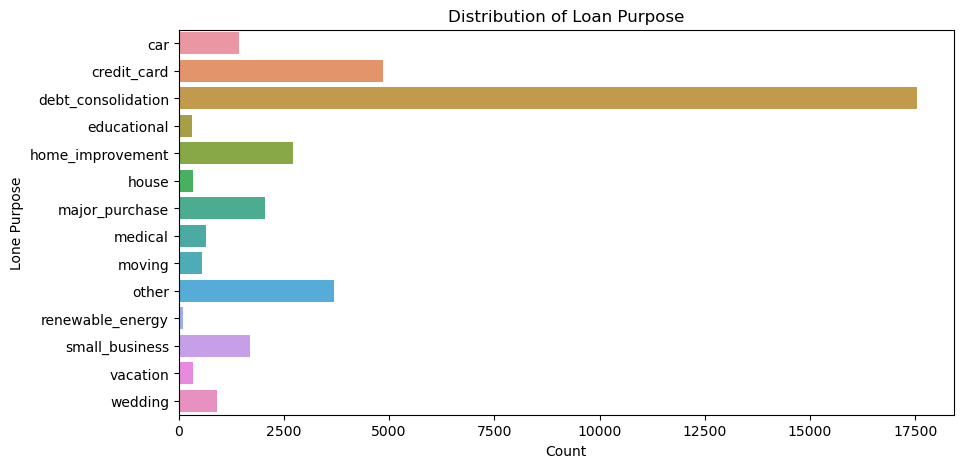

In [94]:
# Distribution of loan purpose
plt.figure(figsize=(10,5))
sb.countplot(y=data2.purpose)
plt.xlabel('Count')
plt.ylabel('Lone Purpose')
plt.title('Distribution of Loan Purpose',fontsize=12)
plt.show()

A large percentage of loans are taken for debt consolidation followed by credit card.

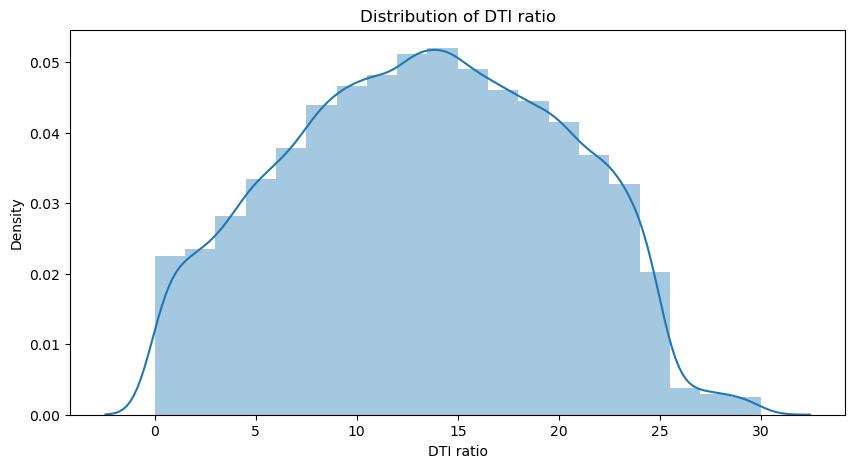

In [95]:
# Distribution of dti
plt.figure(figsize=(10,5))
sb.distplot(data2.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-20 DTI ratio.

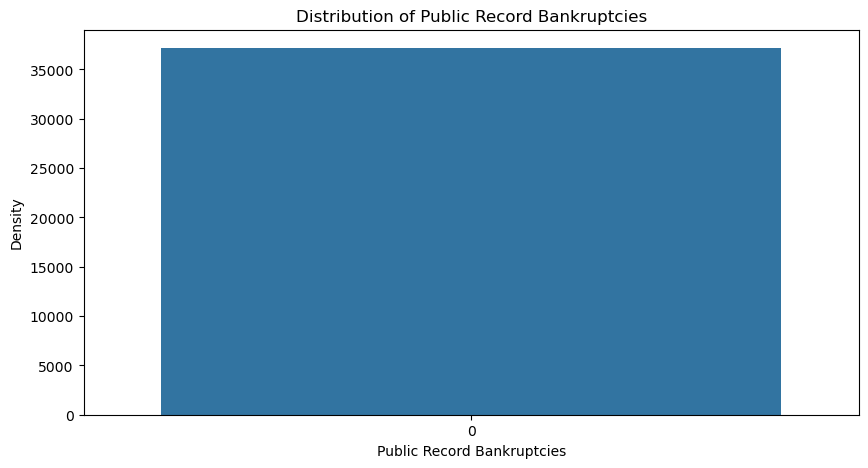

In [96]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sb.countplot(data2.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

Majority of the borrowers have no record of Public Recorded Bankruptcy.

### Segmented Univariate Analysis

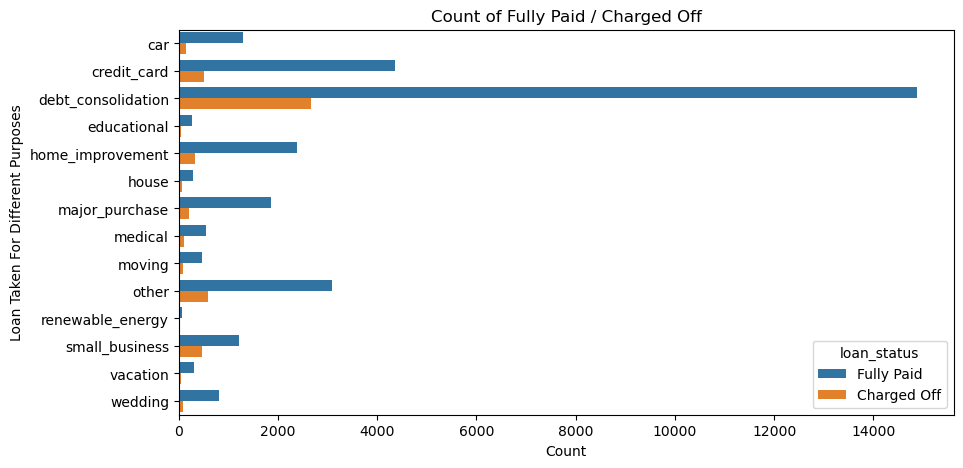

In [97]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sb.countplot(data=data2,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Loan Taken For Different Purposes')
plt.title('Count of Fully Paid / Charged Off',fontsize=12)
plt.show()

Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

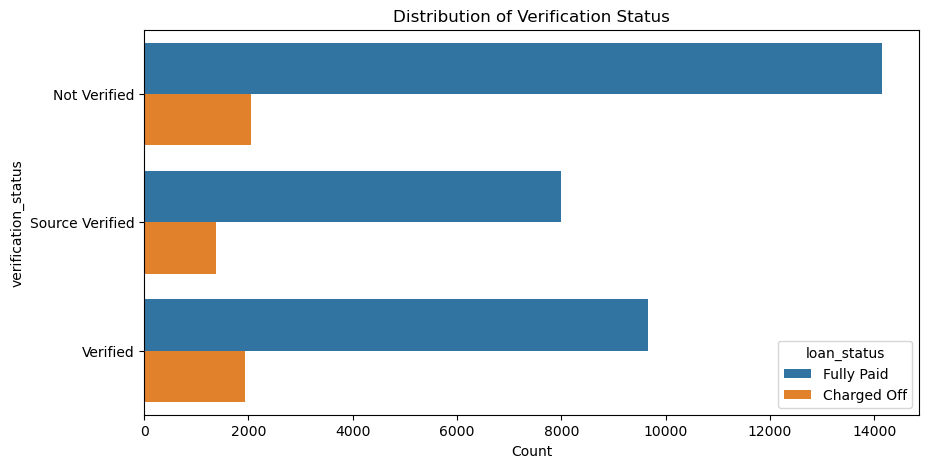

In [125]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sb.countplot(data=data2,y='verification_status',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('verification_status')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

In [126]:
We can see there are defaulters , although they are verified. 

SyntaxError: invalid syntax (299933907.py, line 1)

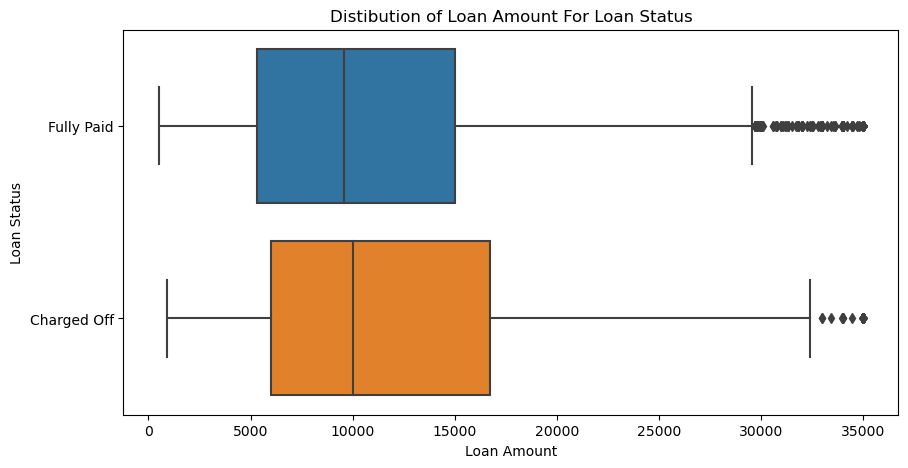

In [98]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sb.boxplot(data=data2,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

Large amount of loan has higher chance of defaulting.

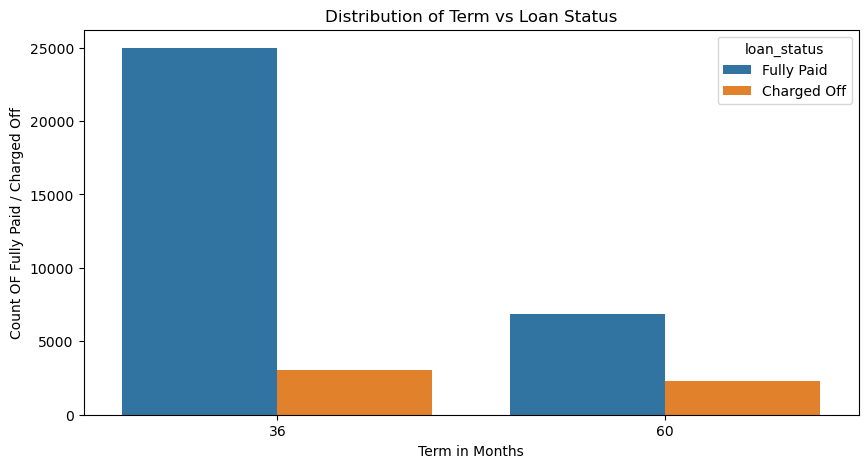

In [99]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sb.countplot(data=data2,x='term',hue='loan_status')
plt.xlabel('Term in Months')
plt.ylabel('Count OF Fully Paid / Charged Off')
plt.title('Distribution of Term vs Loan Status',fontsize=12)
plt.show()

The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

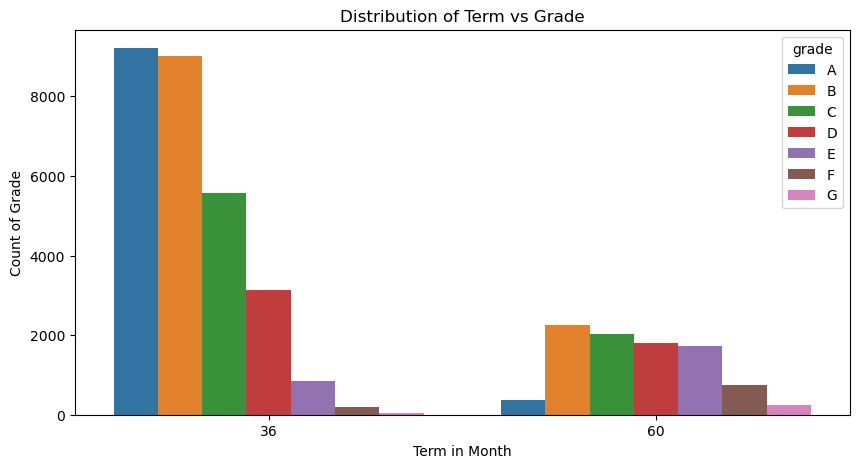

In [100]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sb.countplot(data=data2,x='term',hue='grade')
plt.xlabel('Term in Month')
plt.ylabel('Count of Grade')
plt.title('Distribution of Term vs Grade',fontsize=12)
plt.show()

The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

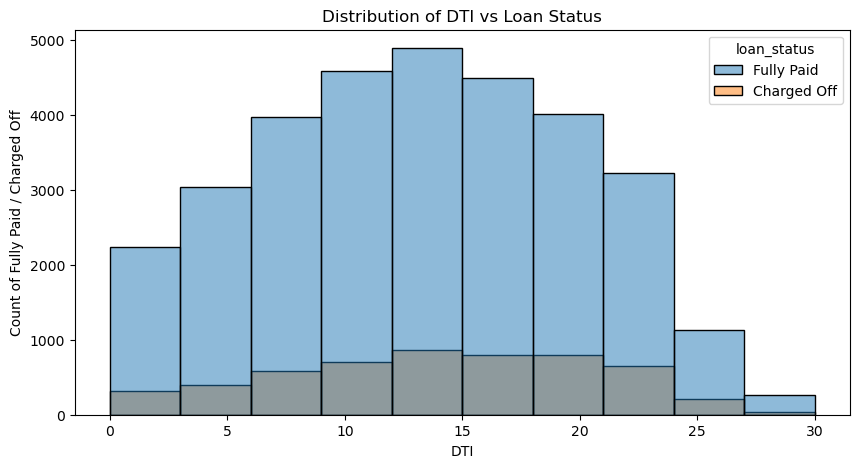

In [101]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sb.histplot(data=data2,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count of Fully Paid / Charged Off')
plt.title('Distribution of DTI vs Loan Status',fontsize=12)
plt.show()

The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-20 have higher number of defaulted loan but higher dti has higher chance of defaulting.

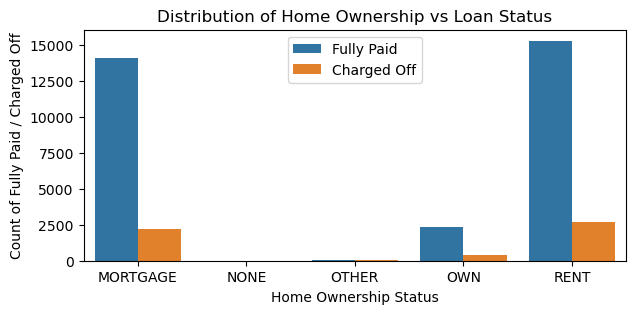

In [108]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(7,3))
sb.countplot(data=data2,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count of Fully Paid / Charged Off')
plt.title('Distribution of Home Ownership vs Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

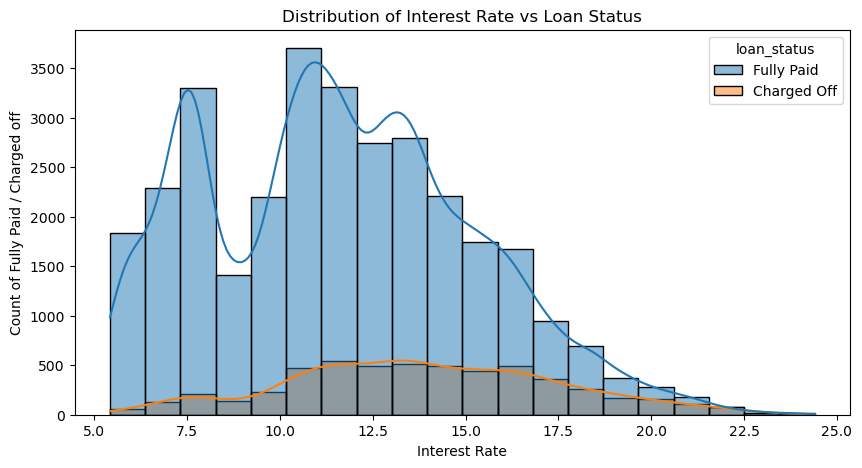

In [109]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sb.histplot(data=data2,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count of Fully Paid / Charged off')
plt.title('Distribution of Interest Rate vs Loan Status',fontsize=12)
plt.show()

The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

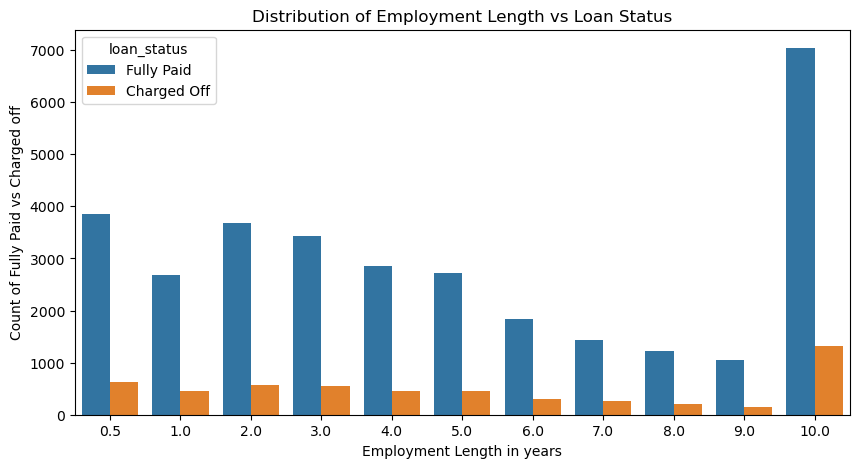

In [110]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sb.countplot(data=data2,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count of Fully Paid vs Charged off')
plt.title('Distribution of Employment Length vs Loan Status',fontsize=12)
plt.show()

The Employees with 10+ years of experience are likely to default and also have higher chance of fully paying the loan.

### Bivariate Analysis

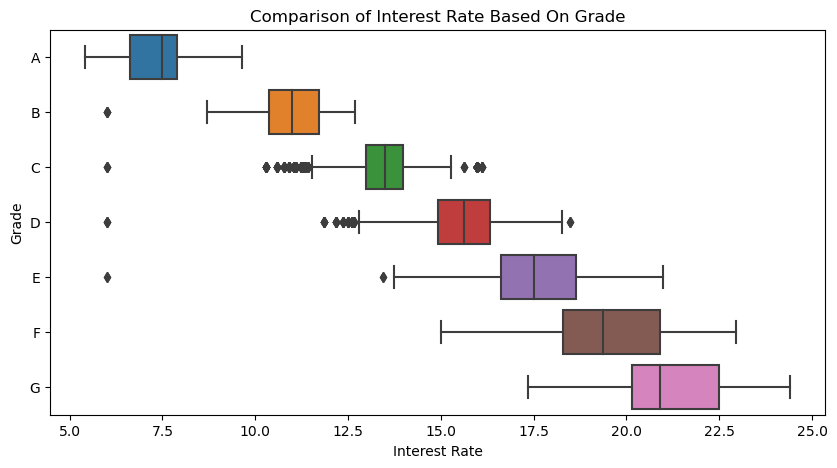

In [118]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sb.boxplot(data=data2,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

The Grade decreases and at the same time, interst rate increases with the risk.

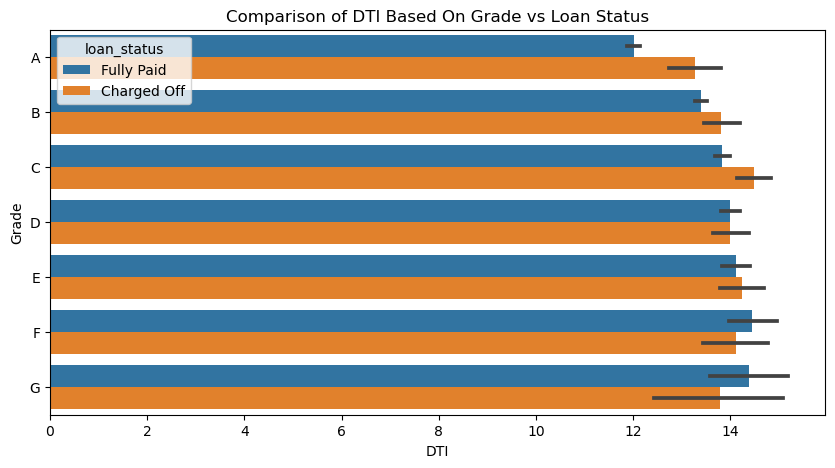

In [119]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sb.barplot(data=data2,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade vs Loan Status',fontsize=12)
plt.show()

The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

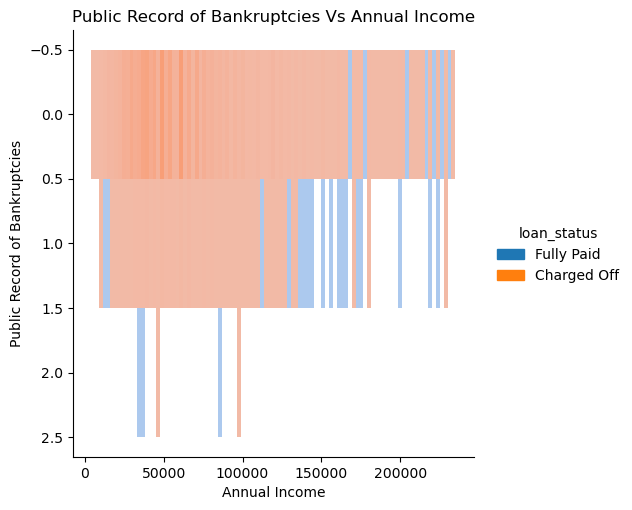

In [123]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sb.displot(y=data2.pub_rec_bankruptcies.astype('category'),x=data2.annual_inc,hue=data2.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record of Bankruptcies')
plt.title('Public Record of Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

## Recommendations
 ### Driving factors (or driver variables) which are strong indicators of loan default:

 1.DTI  
 
 2.Grades 
 
 3.Interest Rate
 
 4.Annual income
 
 5.public record bankruptcies 
 
 6.Employment Length 
 
 7.Loan Term


### Other observations for loan default: 

1.Borrowers with more annual income, having less public record of Bankruptcy.

2.Borrowers having more Public Recorded Bankruptcy are more prone for defaulting.

3.Borrowers with lower grades like E,F,G are likely to default.

4.Very high Debt to Income value ratio are more likely to default.